In [3]:
!pip install matplotlib

In [4]:
!pip install tensorflow 
!pip install scikit-learn

In [5]:
# First of all MNIST dataset needs to be loaded.
# There are many ways like pandas can read the MNIST dataset with CSV file extension
# For reading dataset by pandas it needs to be downloaded manually and file should be added into IDE.
# Due to that reason, I am loading MNIST dataset using tensorflow which has build in medthod for reading the MNIST dataset

# Import the tensorflow 
import tensorflow as tf
# Loading the dataset: already separated into training and testing with feature and target varibales 
(feature_train, target_train),(feature_test, target_test) =  tf.keras.datasets.mnist.load_data() 

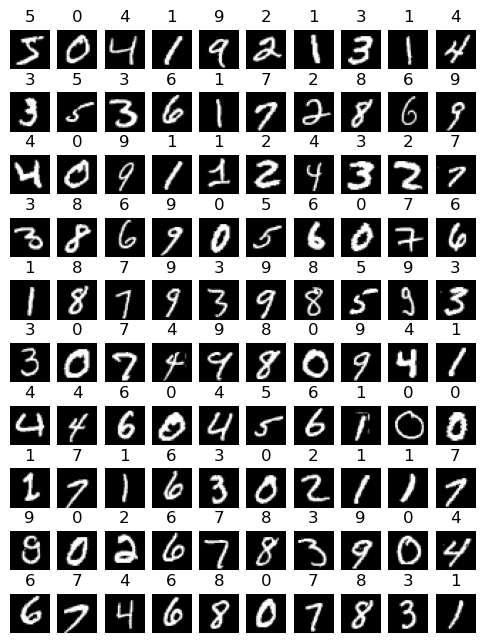

In [6]:
# Importing matplotlib for ploting the dataset
import matplotlib.pyplot as plt
# ploting the dataset
plt.figure(figsize = (6,8))
for i in range(100):
    plt.subplot(10,10, i+1)
    plt.imshow(feature_train[i], cmap = "gray") # Displaying the feature values
    plt.title(f"{target_train[i]}") # Displaying the target value
    plt.axis("off")  # Hide the axes for clarity
plt.show()


In [7]:
# Displaying the dataset 28 X 28
print(f'{feature_train[0]} is {target_train[0]}')

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [8]:
# Normalizing the dataset by dividing 255 inorder to convert the values between 0 and 1: pixel range is 0 to 255
feature_train_normalize = feature_train / 255
feature_test_normalize = feature_test / 255
# Note: Target values are not normalized

In [9]:
# Displaying the normalize dataset 28 X 28
print(f'{feature_train_normalize[0]} is {target_train[0]}')

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [52]:
# Checking the shape of the dataset 
print(f'feature train shape : {feature_train_normalize.shape}')
print(f'feature test shape : {feature_test_normalize.shape}')
# Reshaping the datasize for PCA, t-SNE and autoencoder
feature_train_reshape = feature_train_normalize.reshape(-1,784)
feature_test_reshape = feature_test_normalize.reshape(-1,784)
# Displaying the shape after reshaping 
print(f'feature train shape after reshaping : {feature_train_reshape.shape}')
print(f'feature test shape after reshaping: {feature_test_reshape.shape}')


feature train shape : (60000, 28, 28)
feature test shape : (10000, 28, 28)
feature train shape after reshaping : (60000, 784)
feature test shape after reshaping: (10000, 784)


In [54]:
# Applying PCA for feature extraction 
# Using the scikit-learning Api's for doing PCA
# Import the PCA from scikit-learn
from sklearn.decomposition import PCA
# Defing the scaler for PCA
pca = PCA(n_components = 100) 
# Use the scaler in dataset to extract the feature
feature_train_pca = pca.fit_transform(feature_train_reshape)
feature_test_pca = pca.transform(feature_test_reshape)

In [12]:
# Checking the shape of the dataset after applying PCA
print(f'feature train shape after pca: {feature_train_pca.shape}')
print(f'feature test shape after pca : {feature_test_pca.shape}')

feature train shape after pca: (60000, 100)
feature test shape after pca : (10000, 100)


In [56]:
# Applying t-SNE for feature extraction 
# Using the scikit-learning Api's for doing t-SNE
# Import the TSNE from scikit-learn
from sklearn.manifold import TSNE
# Defining the sacler for TSNE
tSNE = TSNE(n_components = 3, random_state = 0)
feature_train_tSNE = tSNE.fit_transform(feature_train_reshape[:100]) # Due to computational time consumtion : cap the input data
feature_test_tSNE = tSNE.fit_transform(feature_test_reshape[:50])

In [64]:
# Checking the shape of the dataset after applying t-SNE
print(f'feature train shape after t-SNE: {feature_train_tSNE.shape}')
print(f'feature test shape after t-SNE: {feature_test_tSNE.shape}')

feature train shape after t-SNE: (100, 3)
feature test shape after t-SNE: (50, 3)


In [60]:
# Applying Autoencoder for feature extraction 
# Using the tensorflow Api's for doing t-SNE
# Import the  layers and models from tensorflow
from tensorflow.keras import layers, models

# Designing the model of autoencoder
# Defining the input 
dataset_input = layers.Input(shape = (784,))
# Defining the scaler for encoding
encode = layers.Dense(200, activation = 'relu')(dataset_input)
encode = layers.Dense(100, activation = 'relu')(encode)
# Defing the sacler for decoding 
decode = layers.Dense(200, activation = 'relu')(encode)
decode = layers.Dense(784, activation = 'sigmoid')(decode)

# Computing the autoencoder 
autoencoder = models.Model(dataset_input, decode)
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')

# Training the autoencoder
autoencoder.fit(feature_train_reshape, feature_train_reshape, epochs = 20, batch_size = 300, 
                shuffle = True, validation_data = (feature_test_reshape, feature_test_reshape))

# Extracting the feature
encoder = models.Model(dataset_input, encode)
feature_train_autoencoder = encoder.predict(feature_train_reshape)
feature_test_autoencoder = encoder.predict(feature_test_reshape)



Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3125 - val_loss: 0.1281
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1202 - val_loss: 0.1008
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1000 - val_loss: 0.0926
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0922 - val_loss: 0.0875
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0880 - val_loss: 0.0842
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0847 - val_loss: 0.0825
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0826 - val_loss: 0.0805
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0808 - val_loss: 0.0795
Epoch 9/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0796 - val_loss: 0.0778
Epoch 10/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0785 - val_loss: 0.0773
Epoch 11/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0775 - val_loss: 0.0761
Epoch 12/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

In [62]:
# Checking the shape of the dataset after applying t-SNE
print(f'feature train shape after autoencoder: {feature_train_autoencoder.shape}')
print(f'feature test shape after autoencoder : {feature_test_autoencoder.shape}')

feature train shape after autoencoder: (60000, 100)
feature test shape after autoencoder : (10000, 100)


In [48]:
# After reducing the dimension by PCA, t-SNE and autoencoder 
# Lets evaluate them by using k-NN
# Importing the library for k-NN form sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score # for checking the accuracy of the model 

# Predicting by using Dataset that are reduce using PCA
# Defining the scaler for k-nn
KNN_PCA = KNeighborsClassifier(n_neighbors = 5)
# Training the model 
KNN_PCA.fit(feature_train_pca, target_train)
# Predicting 
y_hat_pca = KNN_PCA.predict(feature_test_pca)
accuracy_pca = accuracy_score(target_test, y_hat_pca)

# Predicting by using Dataset that are reduce using t-SNE
# Defining the scaler for k-nn
KNN_tSNE = KNeighborsClassifier(n_neighbors = 5)
# Training the model 
KNN_tSNE.fit(feature_train_tSNE, target_train[:100])
# Predicting 
y_hat_tSNE = KNN_tSNE.predict(feature_test_tSNE)
accuracy_tSNE = accuracy_score(target_test[:50], y_hat_tSNE)


# Predicting by using Dataset that are reduce using autoencoder
# Defining the scaler for k-nn
KNN_autoencoder = KNeighborsClassifier(n_neighbors = 5)
# Training the model 
KNN_autoencoder.fit(feature_train_autoencoder, target_train)
# Predicting 
y_hat_autoencoder = KNN_autoencoder.predict(feature_test_autoencoder)
accuracy_autoencoder = accuracy_score(target_test, y_hat_autoencoder)

In [50]:
# Checking the accuracy of all the model with different feature extraction technique 
print(f'Accuracy of model with pca feature extraction: {accuracy_pca }')
print(f'Accuracy of model with t-SNE feature extraction: {accuracy_tSNE}')
print(f'Accuracy of model with autoencoder feature extraction: {accuracy_autoencoder}')

Accuracy of model with pca feature extraction: 0.9726
Accuracy of model with t-SNE feature extraction: 0.14
Accuracy of model with autoencoder feature extraction: 0.9641
